##  Stages of Analysis

1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

#### 1.1. Importing Libraries

In [2]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd, numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot as plt

#### 1.2.  Loading the data
The data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [3]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

Read in the excel file into a df

### 2. Cleaning, transforming, and visualizing

**2.1. Exploring your data** 

In [4]:
properties.shape

(345, 49)

In [5]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [7]:
properties.isnull().sum()

Unnamed: 0                1
City of London            0
Barking & Dagenham        0
Barnet                    0
Bexley                    0
Brent                     0
Bromley                   0
Camden                    0
Croydon                   0
Ealing                    0
Enfield                   0
Greenwich                 0
Hackney                   0
Hammersmith & Fulham      0
Haringey                  0
Harrow                    0
Havering                  0
Hillingdon                0
Hounslow                  0
Islington                 0
Kensington & Chelsea      0
Kingston upon Thames      0
Lambeth                   0
Lewisham                  0
Merton                    0
Newham                    0
Redbridge                 0
Richmond upon Thames      0
Southwark                 0
Sutton                    0
Tower Hamlets             0
Waltham Forest            0
Wandsworth                0
Westminster               0
Unnamed: 34             345
Inner London        

***Check for missing values. Data is fairly complete except for Unnamed columns in which all column data is missing***

**2.2. Cleaning the data**

In [8]:
properties.T.head()

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738


In [9]:
properties_T = properties.T

In [10]:
properties_T = properties_T.reset_index()

In [11]:
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,335,336,337,338,339,340,341,342,343,344
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738


In [12]:
properties_T.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           335,     336,     337,     338,     339,     340,     341,     342,
           343,     344],
      dtype='object', length=346)

In [13]:
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,335,336,337,338,339,340,341,342,343,344
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738


In [14]:
properties_T.iloc[0]

index             Unnamed: 0
0                        NaT
1        1995-01-01 00:00:00
2        1995-02-01 00:00:00
3        1995-03-01 00:00:00
                ...         
340      2023-04-01 00:00:00
341      2023-05-01 00:00:00
342      2023-06-01 00:00:00
343      2023-07-01 00:00:00
344      2023-08-01 00:00:00
Name: 0, Length: 346, dtype: object

In [15]:
properties_T.columns = properties_T.iloc[0]

In [16]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738


In [17]:
properties.iloc[0]

Unnamed: 0                    NaT
City of London          E09000001
Barking & Dagenham      E09000002
Barnet                  E09000003
Bexley                  E09000004
Brent                   E09000005
Bromley                 E09000006
Camden                  E09000007
Croydon                 E09000008
Ealing                  E09000009
Enfield                 E09000010
Greenwich               E09000011
Hackney                 E09000012
Hammersmith & Fulham    E09000013
Haringey                E09000014
Harrow                  E09000015
Havering                E09000016
Hillingdon              E09000017
Hounslow                E09000018
Islington               E09000019
Kensington & Chelsea    E09000020
Kingston upon Thames    E09000021
Lambeth                 E09000022
Lewisham                E09000023
Merton                  E09000024
Newham                  E09000025
Redbridge               E09000026
Richmond upon Thames    E09000027
Southwark               E09000028
Sutton        

In [18]:
properties_T.drop(0)

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,564101,554306,550731,534058,526204,523326,528847,534745,535976,562572
6,Bromley,E09000006,81671.47692,81657.55944,81449.31143,81124.41227,81542.61561,82382.83435,82898.52264,82054.37156,...,514117,512803,509634,504060,499096,500656,499162,502086,510059,511635
7,Camden,E09000007,120932.8881,119508.8622,120282.2131,120097.899,119929.2782,121887.4625,124027.5768,125529.8039,...,840125,854734,858052,867856,850802,866965,842869,861244,840967,869066
8,Croydon,E09000008,69158.16225,68951.09542,68712.44341,68610.04641,68844.9169,69052.51103,69142.48112,68993.42545,...,429428,428154,430223,426920,419497,411938,409827,408088,412609,416795
9,Ealing,E09000009,79885.89069,80897.06551,81379.86288,82188.90498,82077.05525,81630.66181,82352.2226,82706.65927,...,531785,531306,533027,537077,523849,523266,525281,533979,540753,542386
10,Enfield,E09000010,72514.69096,73155.19746,72190.44144,71442.92235,70630.77955,71348.31147,71837.54011,72237.94562,...,459724,458893,449710,443335,438673,437447,440741,440498,445650,443892


In [19]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738


In [20]:
properties_T = properties_T.drop(0)

In [21]:
properties_T.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,564101,554306,550731,534058,526204,523326,528847,534745,535976,562572


***Here we choose to transpose the data to make it make more sense, so that the borough names are by name and timestamps are the columns***

**2.3. Cleaning the data (part 2)**

In [22]:
properties_T.rename(columns = {'Unnamed: 0': 'London Boroughs', pd.NaT: 'ID'}, inplace=True)

In [23]:
properties_T.head()

,London Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,564101,554306,550731,534058,526204,523326,528847,534745,535976,562572


**2.4.Transforming the data**

In [24]:
properties_test = properties_T.copy()

In [25]:
properties_test.head()

,London Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,564101,554306,550731,534058,526204,523326,528847,534745,535976,562572


In [26]:
pd.melt(properties_test, id_vars=['London Boroughs', 'ID'])

,London Boroughs,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
16507,LONDON,E12000007,2023-08-01,535597
16508,SOUTH EAST,E12000008,2023-08-01,393417
16509,SOUTH WEST,E12000009,2023-08-01,328413
16510,Unnamed: 47,NaN,2023-08-01,NaN


***We melt the data to make each row easier to read / parse***

In [27]:
properties_test.head()

,London Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,1004980,989002,976880,882390,928659,901416,950017,943903,928536,889432
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,354425,356184,353028,345576,344707,347952,350094,346736,343646,349371
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,591947,592792,597531,604633,598613,589433,577357,578060,586454,598661
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,408668,408509,400602,402515,400047,399571,394745,394225,400227,393738
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,564101,554306,550731,534058,526204,523326,528847,534745,535976,562572


In [28]:
clean_properties = pd.melt(properties_T, id_vars=['London Boroughs', 'ID'])

In [29]:
clean_properties.head()

,London Boroughs,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [30]:
clean_properties = clean_properties.rename(columns={0: 'Date', 'value': 'Average_price'})

In [31]:
clean_properties.head()

,London Boroughs,ID,Date,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [32]:
clean_properties.dtypes

London Boroughs            object
ID                         object
Date               datetime64[ns]
Average_price              object
dtype: object

***We want to change the price over to numeric***

In [33]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

In [34]:
clean_properties.head()

,London Boroughs,ID,Date,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [35]:
clean_properties.dtypes

London Boroughs            object
ID                         object
Date               datetime64[ns]
Average_price             float64
dtype: object

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [36]:
clean_properties.count()

London Boroughs    16512
ID                 15480
Date               16512
Average_price      15480
dtype: int64

In [37]:
clean_properties['London Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [38]:
len(clean_properties['London Boroughs'].unique())

48

In [39]:
clean_properties['London Boroughs'] == 'Unnamed: 37'

0        False
1        False
2        False
3        False
4        False
         ...  
16507    False
16508    False
16509    False
16510    False
16511    False
Name: London Boroughs, Length: 16512, dtype: bool

In [40]:
clean_properties[clean_properties['London Boroughs'] == 'Unnamed: 37']

,London Boroughs,ID,Date,Average_price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN
...,...,...,...,...
16308,Unnamed: 37,NaN,2023-04-01,NaN
16356,Unnamed: 37,NaN,2023-05-01,NaN
16404,Unnamed: 37,NaN,2023-06-01,NaN
16452,Unnamed: 37,NaN,2023-07-01,NaN


In [41]:
df1 = clean_properties[clean_properties['Average_price'].notna()]

In [42]:
df1.head()

,London Boroughs,ID,Date,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [43]:
df1.count()

London Boroughs    15480
ID                 15480
Date               15480
Average_price      15480
dtype: int64

In [44]:
df1['London Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [45]:
len(df1['London Boroughs'].unique())

45

In [46]:
invalidBoroughs = ['LONDON', 'England', 'NORTH WEST', 'Inner London', 'Outer London', 'EAST MIDLANDS', 'SOUTH EAST', 'NORTH EAST', 'WEST MIDLANDS', 'SOUTH WEST', 'EAST OF ENGLAND', 'YORKS & THE HUMBER']

In [47]:
df1[df1['London Boroughs'].isin(invalidBoroughs)]

,London Boroughs,ID,Date,Average_price
34,Inner London,E13000001,1995-01-01,78251.97650
35,Outer London,E13000002,1995-01-01,72958.79836
37,NORTH EAST,E12000001,1995-01-01,42076.35411
38,NORTH WEST,E12000002,1995-01-01,43958.48001
39,YORKS & THE HUMBER,E12000003,1995-01-01,44803.42878
...,...,...,...,...
16506,EAST OF ENGLAND,E12000006,2023-08-01,350728.00000
16507,LONDON,E12000007,2023-08-01,535597.00000
16508,SOUTH EAST,E12000008,2023-08-01,393417.00000
16509,SOUTH WEST,E12000009,2023-08-01,328413.00000


In [48]:
df1 = df1[~df1['London Boroughs'].isin(invalidBoroughs)]

In [49]:
df1.head()

,London Boroughs,ID,Date,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [50]:
df1.count()

London Boroughs    11352
ID                 11352
Date               11352
Average_price      11352
dtype: int64

In [51]:
df1.shape

(11352, 4)

In [52]:
df = df1

In [53]:
df.shape

(11352, 4)

In [54]:
df.dtypes

London Boroughs            object
ID                         object
Date               datetime64[ns]
Average_price             float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [55]:
barnet = df[df['London Boroughs']=='Barnet']

In [56]:
barnet.head()

,London Boroughs,ID,Date,Average_price
2,Barnet,E09000003,1995-01-01,93284.51832
50,Barnet,E09000003,1995-02-01,93190.16963
98,Barnet,E09000003,1995-03-01,92247.52435
146,Barnet,E09000003,1995-04-01,90762.87492
194,Barnet,E09000003,1995-05-01,90258.00033


In [64]:
barnet.tail()

,London Boroughs,ID,Date,Average_price
16274,Barnet,E09000003,2023-04-01,589433.0
16322,Barnet,E09000003,2023-05-01,577357.0
16370,Barnet,E09000003,2023-06-01,578060.0
16418,Barnet,E09000003,2023-07-01,586454.0
16466,Barnet,E09000003,2023-08-01,598661.0


***Create housing prices for Barnet***

Text(0.5, 1.0, 'Barnet Housing Prices frrom 1995 to 2020')

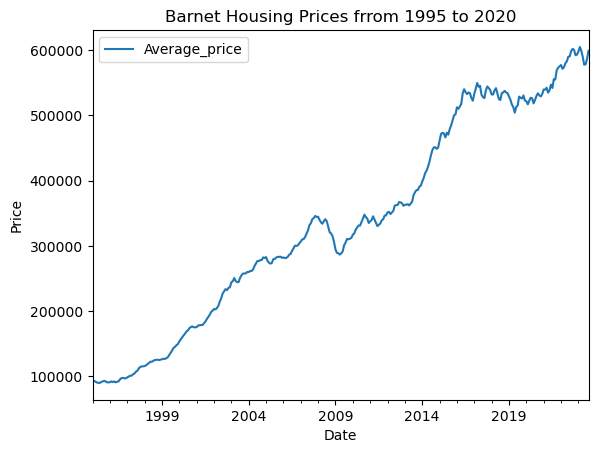

In [65]:
ax = barnet.plot(kind='line', x= 'Date', y= 'Average_price')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Barnet Housing Prices frrom 1995 to 2020')

In [66]:
df['Year'] = df['Date'].apply(lambda d: d.year)

In [67]:
df.head()

,London Boroughs,ID,Date,Average_price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995


In [68]:
df.tail()

,London Boroughs,ID,Date,Average_price,Year
16492,Sutton,E09000029,2023-08-01,427744.0,2023
16493,Tower Hamlets,E09000030,2023-08-01,464536.0,2023
16494,Waltham Forest,E09000031,2023-08-01,501675.0,2023
16495,Wandsworth,E09000032,2023-08-01,627901.0,2023
16496,Westminster,E09000033,2023-08-01,950206.0,2023


In [69]:
df[df['London Boroughs'] == 'Sutton']

,London Boroughs,ID,Date,Average_price,Year
28,Sutton,E09000029,1995-01-01,71536.97357,1995
76,Sutton,E09000029,1995-02-01,70893.20851,1995
124,Sutton,E09000029,1995-03-01,70306.83844,1995
172,Sutton,E09000029,1995-04-01,69411.94390,1995
220,Sutton,E09000029,1995-05-01,69759.21989,1995
...,...,...,...,...,...
16300,Sutton,E09000029,2023-04-01,435145.00000,2023
16348,Sutton,E09000029,2023-05-01,434288.00000,2023
16396,Sutton,E09000029,2023-06-01,430792.00000,2023
16444,Sutton,E09000029,2023-07-01,429382.00000,2023


In [78]:
df_year = df.groupby(['London Boroughs','Year'])['Average_price'].mean()\
.reset_index()

In [79]:
df_year.sample(20)

,London Boroughs,Year,Average_price
136,Bromley,2015,385681.450108
855,Tower Hamlets,2009,258248.290575
335,Hackney,2011,308698.435383
301,Greenwich,2006,207167.286292
604,Kingston upon Thames,2019,487327.607975
86,Bexley,2023,398208.750000
459,Havering,2019,364652.157308
283,Enfield,2017,395929.176617
319,Hackney,1995,66024.476545
815,Sutton,1998,92087.045921


In [80]:
df_year.head()

,London Boroughs,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

In [81]:
df_year[df_year['London Boroughs'] == 'Barnet']

,London Boroughs,Year,Average_price
29,Barnet,1995,91792.537433
30,Barnet,1996,94000.445448
31,Barnet,1997,106883.185546
32,Barnet,1998,122359.468033
33,Barnet,1999,136004.512067
34,Barnet,2000,167952.633958
35,Barnet,2001,185563.352600
36,Barnet,2002,220746.059225
37,Barnet,2003,251212.927683
38,Barnet,2004,271854.112992


In [82]:
barnet = df_year[df_year['London Boroughs'] == 'Barnet']
barnet.head()

,London Boroughs,Year,Average_price
29,Barnet,1995,91792.537433
30,Barnet,1996,94000.445448
31,Barnet,1997,106883.185546
32,Barnet,1998,122359.468033
33,Barnet,1999,136004.512067


In [83]:
p1998 = barnet[barnet['Year'] == 1998]
p2018 = barnet[barnet['Year'] == 2018]
print(p1998)
print(p2018)

   London Boroughs  Year  Average_price
32          Barnet  1998  122359.468033
   London Boroughs  Year  Average_price
52          Barnet  2018  533266.534055


In [86]:
def priceRatio(prevYear, laterYear, borough, df):
    dfb = df[df['London Boroughs'] == borough]
#     print(dfb[dfb['Year'] == prevYear])
#     print(dfb[dfb['Year'] == laterYear])
    prevPrice = float(dfb[dfb['Year'] == prevYear]['Average_price'].iloc[0])
    laterPrice = float(dfb[dfb['Year'] == laterYear]['Average_price'].iloc[0])
    
    return laterPrice / prevPrice

In [87]:
priceRatio(1998, 2018, 'Camden', df_year)

4.935353408884261

In [88]:
priceRatio(1998, 2018, 'Barking & Dagenham', df_year)

4.89661861291754

In [89]:
df_year['London Boroughs'].unique()

array(['Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [90]:
housing_ratios = {}

for b in df_year['London Boroughs'].unique():
    housing_ratios[b] = [priceRatio(1998, 2018, b, df_year)]

print(housing_ratios)

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.094784685333876], 'Camden': [4.935353408884261], 'City of London': [5.30162037758761], 'Croydon': [4.201100280024766], 'Ealing': [4.311450902121834], 'Enfield': [4.263471583495811], 'Greenwich': [4.7630363473291935], 'Hackney': [6.198285561008663], 'Hammersmith & Fulham': [4.13779810193623], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335307], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802297], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514062], 'Lewisham': [5.449221041059686], 'Merton': [4.741273313294603], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379378], 'Sutton': [4.1185226085731

In [91]:
df_ratios = pd.DataFrame(housing_ratios)

In [92]:
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,5.30162,4.2011,4.311451,4.263472,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [93]:
df_ratios_T = df_ratios.T

In [94]:
df_ratios_T.head()

,0
Barking & Dagenham,4.896619
Barnet,4.358196
Bexley,4.248977
Brent,4.894554
Bromley,4.094785


In [95]:
df_ratios_T = df_ratios_T.reset_index()

In [96]:
df_ratios_T.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [97]:
df_ratios_T = df_ratios_T.rename(columns={'index': 'London Borough', 0: 'Ratio of Average Housing Price between 2018 and 1998'})

In [98]:
df_ratios_T.head()

,London Borough,Ratio of Average Housing Price between 2018 and 1998
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [101]:
ratios_sorted = df_ratios_T.sort_values(by='Ratio of Average Housing Price between 2018 and 1998', ascending=False).reset_index()

In [105]:
top15 = ratios_sorted.head(15)
top15

,index,London Borough,Ratio of Average Housing Price between 2018 and 1998
0,11,Hackney,6.198286
1,30,Waltham Forest,5.834756
2,27,Southwark,5.516485
3,22,Lewisham,5.449221
4,32,Westminster,5.353565
5,24,Newham,5.305390
6,6,City of London,5.301620
7,13,Haringey,5.134625
8,19,Kensington & Chelsea,5.082465
9,21,Lambeth,4.957751


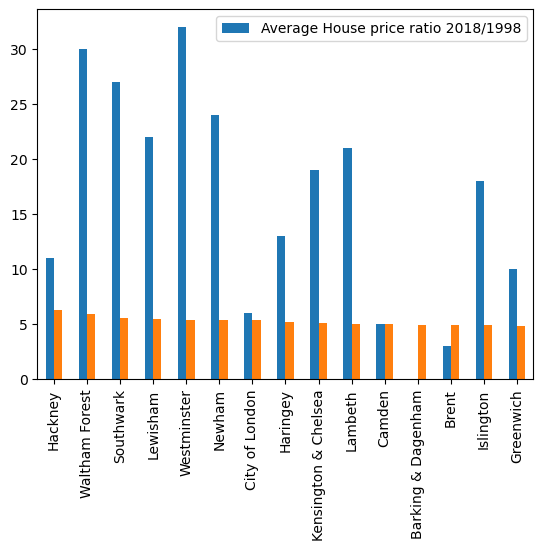

In [109]:
ax = top15.plot(kind='bar');
ax.set_xticklabels(top15['London Borough']);
ax.legend(['Average House price ratio 2018/1998']);

In [110]:
ratios_sorted.head()

,index,London Borough,Ratio of Average Housing Price between 2018 and 1998
0,11,Hackney,6.198286
1,30,Waltham Forest,5.834756
2,27,Southwark,5.516485
3,22,Lewisham,5.449221
4,32,Westminster,5.353565


In [111]:
ratios_sorted['Ratio of Average Housing Price between 2018 and 1998'].describe()

count    33.000000
mean      4.716235
std       0.571489
min       3.976409
25%       4.248977
50%       4.741273
75%       5.082465
max       6.198286
Name: Ratio of Average Housing Price between 2018 and 1998, dtype: float64

### 4. Conclusion

**Average housing prices have more than quadrupled since the last 2 decades in London's Boroughs. On average, across all of London's Boroughs, house prices have increased 4.72 times from 1998 to 2018. From the Hounslow Borough, which had a housing price increase of 3.98 times since 1998, to the Hackney Borough, which had a housing price increase of 6.20 times since 1998, we can see that the prices in real estate are rapidly growing.**